# Loan Data Exploratory Data Analysis (EDA)

## Overview
This notebook performs an exploratory data analysis (EDA) on loan application data to understand patterns and relationships that may influence loan approval decisions.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

## 1. Data Loading and Initial Exploration

In [23]:
df = pd.read_csv(r'data/Loandata.csv')

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
df.shape

(614, 13)

## 2. Data Summary and Statistics

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [29]:
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


The dataset contains 614 loan applications with 13 features:
- `Loan_ID`: Unique identifier
- `Gender`: Applicant's gender
- `Married`: Marital status
- `Dependents`: Number of dependents
- `Education`: Education level
- `Self_Employed`: Self-employment status
- `ApplicantIncome`: Applicant's income
- `CoapplicantIncome`: Co-applicant's income
- `LoanAmount`: Loan amount requested
- `Loan_Amount_Term`: Loan term in days
- `Credit_History`: Credit history meets guidelines (1=yes, 0=no)
- `Property_Area`: Location of property
- `Loan_Status`: Loan approved (Y/N)

## 3. Data Cleaning and Preprocessing

In [31]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


## Key Findings

### Data Quality Issues
- Missing values found in several columns:
  - Gender (13 missing)
  - Married (3 missing)
  - Dependents (15 missing)
  - Self_Employed (32 missing)
  - LoanAmount (22 missing)
  - Loan_Amount_Term (14 missing)
  - Credit_History (50 missing)

In [32]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [33]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [34]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [35]:
df['Dependents'] = df['Dependents'].replace({'3+': '3'})

In [36]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [37]:
df['Dependents'] = df['Dependents'].astype(int)

In [38]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [39]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [40]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [41]:
df['Credit_History'].value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

In [42]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [43]:
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


### Data Cleaning
- Filled missing categorical variables with mode
- Converted Dependents category "3+" to "3" and filled missing values with mode
- Filled missing numerical variables with median/mode
- Converted categorical variables to numerical:
  - Gender: Male=1, Female=0
  - Married: Yes=1, No=0
  - Education: Graduate=1, Not Graduate=0
  - Self_Employed: Yes=1, No=0
  - Loan_Status: Y=1, N=0
  - Property_Area: One-hot encoded

In [44]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 4. Feature Engineering

In [47]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
df['BalanceIncome'] = df['TotalIncome'] - (df['EMI'] * 1000) 

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,BalanceIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667,5608.333333


In [49]:
# Convert categorical to numerical
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [50]:
# Property Area (one-hot encoding)
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,EMI,BalanceIncome,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,5849.0,0.355556,5493.444444,False,True
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0.355556,5735.444444,False,False
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,3000.0,0.183333,2816.666667,False,True
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0.333333,4607.666667,False,True
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,6000.0,0.391667,5608.333333,False,True


In [52]:
df = df.drop('Loan_ID', axis=1)

#### Created new features:
- `TotalIncome`: ApplicantIncome + CoapplicantIncome
- `EMI`: LoanAmount / Loan_Amount_Term
- `BalanceIncome`: TotalIncome - (EMI * 1000)

#### Converted catogerical values into numerical values

## 5. Data Visualization

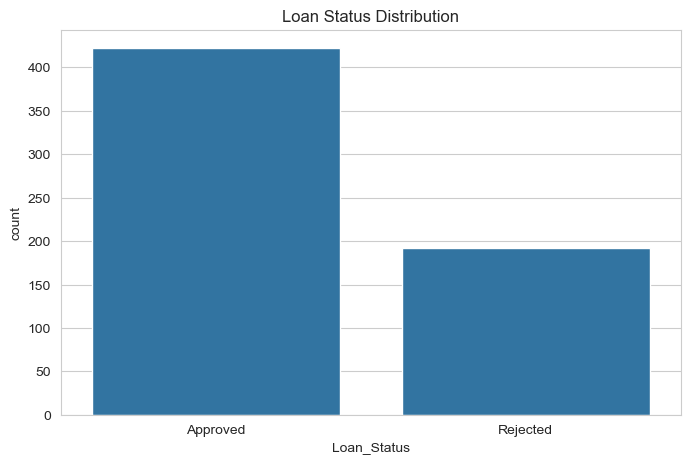

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Loan_Status'].map({0: 'Rejected', 1: 'Approved'}), data=df)
plt.title('Loan Status Distribution')
plt.show()

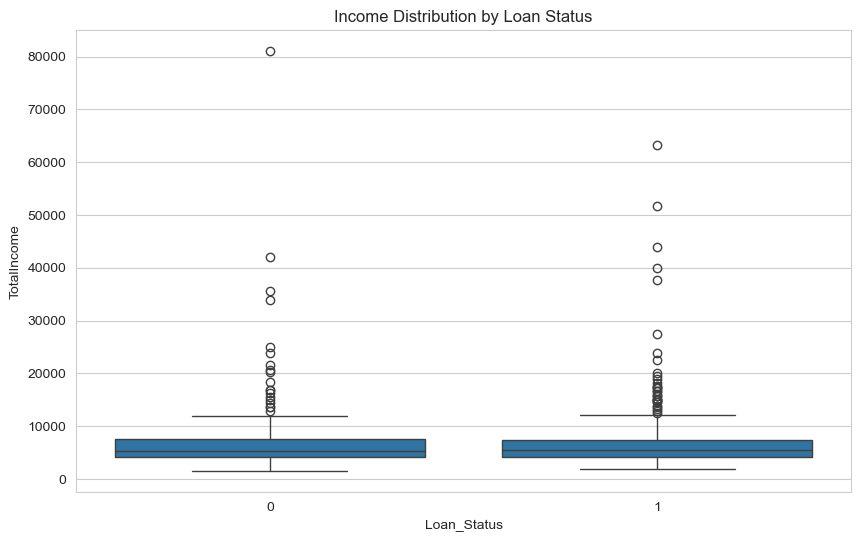

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status', y='TotalIncome', data=df)
plt.title('Income Distribution by Loan Status')
plt.show()


<Figure size 800x500 with 0 Axes>

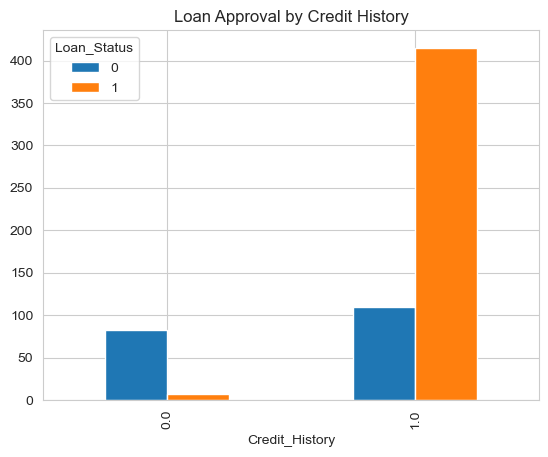

In [56]:
plt.figure(figsize=(8,5))
pd.crosstab(df['Credit_History'], df['Loan_Status']).plot(kind='bar')
plt.title('Loan Approval by Credit History')
plt.show()

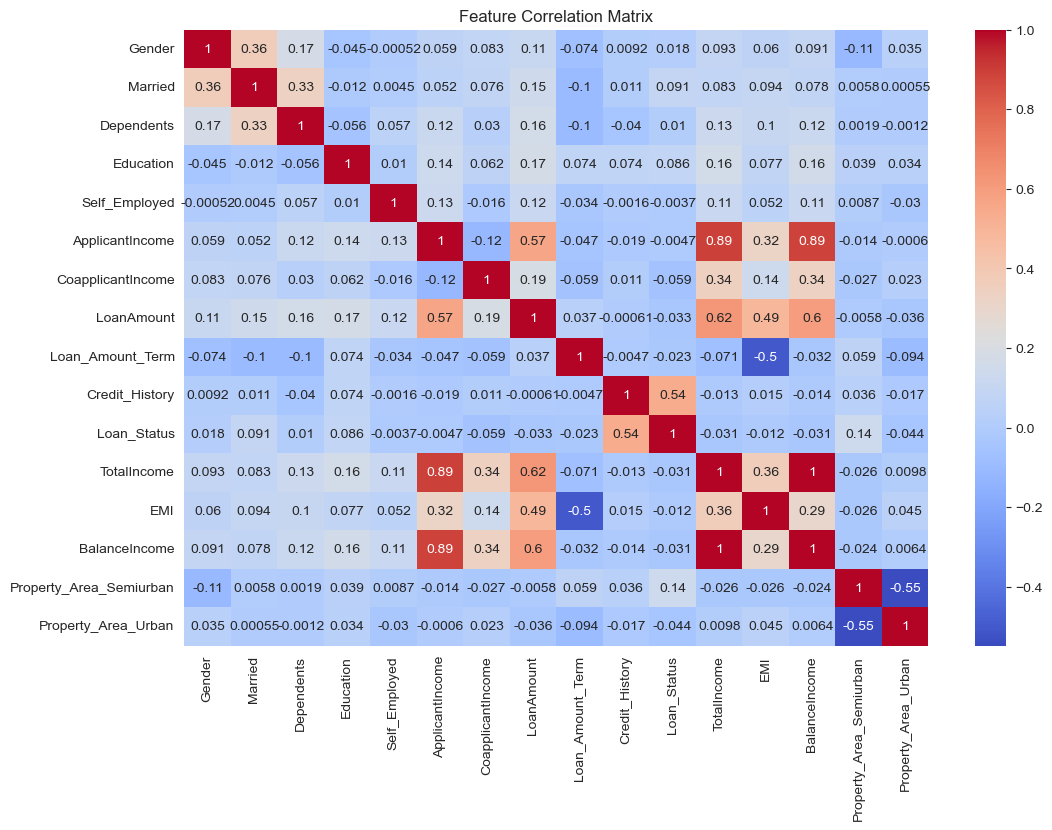

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [58]:
df.to_csv(r'data/cleaned_data.csv', index=False)

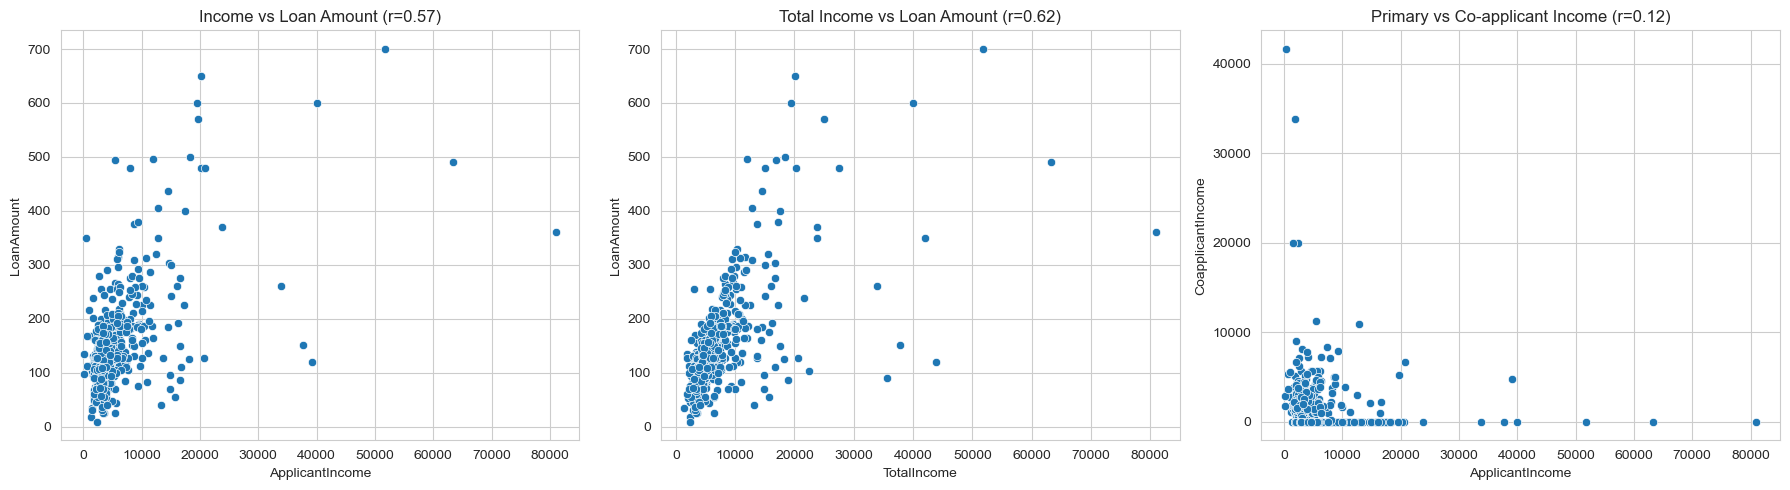

In [97]:
# Scatter plots for outlier detection
plt.figure(figsize=(18,5))

# Applicant Income vs Loan Amount
plt.subplot(1,3,1)
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Income vs Loan Amount (r=0.57)')

# Total Income vs Loan Amount
plt.subplot(1,3,2)
sns.scatterplot(x='TotalIncome', y='LoanAmount', data=df)
plt.title('Total Income vs Loan Amount (r=0.62)')

# Applicant Income vs Co applicant Income
plt.subplot(1,3,3)
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=df)
plt.title('Primary vs Co-applicant Income (r=0.12)')

plt.tight_layout()
plt.show()

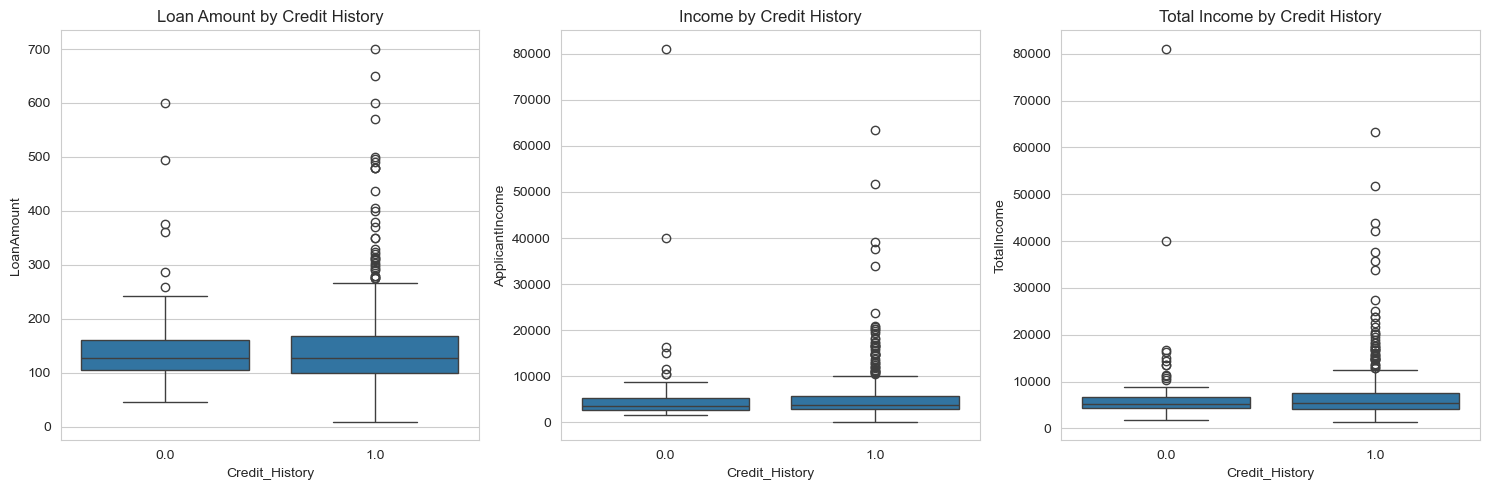

In [99]:
# Boxplots split by credit history
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Credit_History', y='LoanAmount', data=df)
plt.title('Loan Amount by Credit History')

plt.subplot(1,3,2)
sns.boxplot(x='Credit_History', y='ApplicantIncome', data=df)
plt.title('Income by Credit History')

plt.subplot(1,3,3)
sns.boxplot(x='Credit_History', y='TotalIncome', data=df)
plt.title('Total Income by Credit History')

plt.tight_layout()
plt.show()

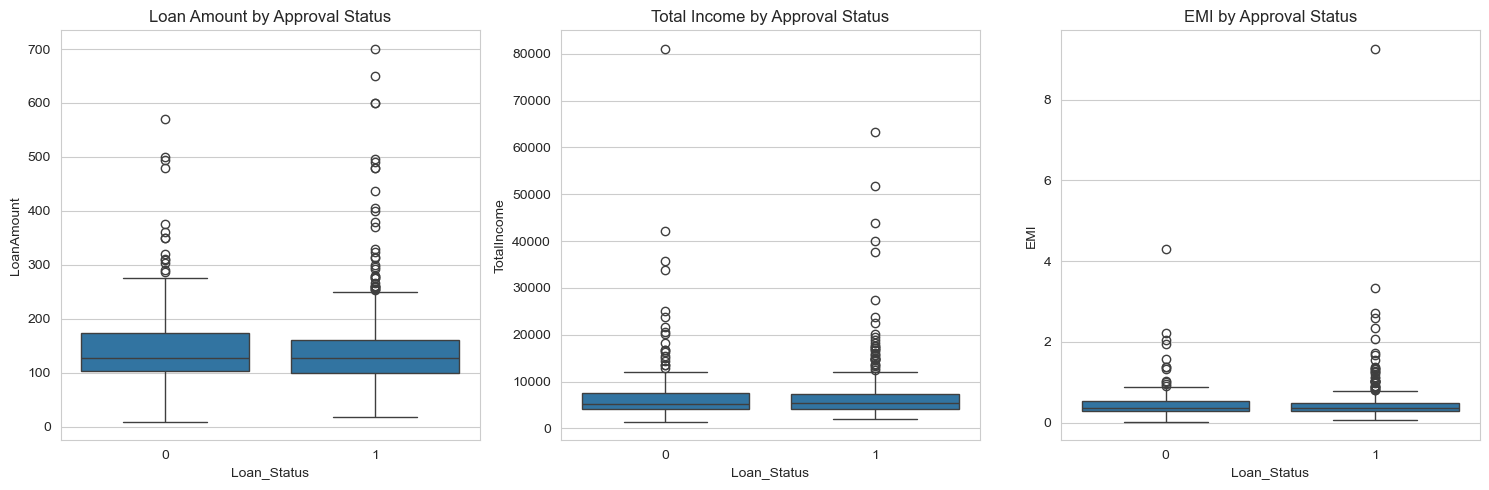

In [103]:
# Compare approved vs rejected loans
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Amount by Approval Status')

plt.subplot(1,3,2)
sns.boxplot(x='Loan_Status', y='TotalIncome', data=df)
plt.title('Total Income by Approval Status')

plt.subplot(1,3,3)
sns.boxplot(x='Loan_Status', y='EMI', data=df)
plt.title('EMI by Approval Status')

plt.tight_layout()
plt.show()

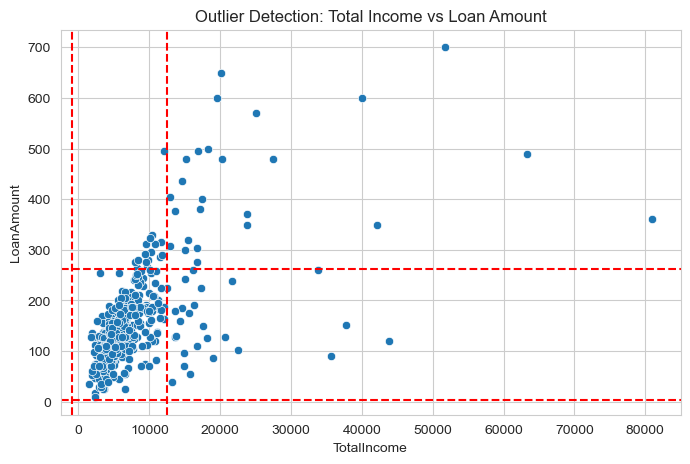

In [105]:
# Example: Highlight outliers in red
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x='TotalIncome', y='LoanAmount', data=df)

# Calculate IQR
Q1 = df[['TotalIncome','LoanAmount']].quantile(0.25)
Q3 = df[['TotalIncome','LoanAmount']].quantile(0.75)
IQR = Q3 - Q1

# Plot outlier bounds
ax.axhline(y=Q3['LoanAmount']+1.5*IQR['LoanAmount'], color='r', linestyle='--')
ax.axhline(y=Q1['LoanAmount']-1.5*IQR['LoanAmount'], color='r', linestyle='--')
ax.axvline(x=Q3['TotalIncome']+1.5*IQR['TotalIncome'], color='r', linestyle='--')
ax.axvline(x=Q1['TotalIncome']-1.5*IQR['TotalIncome'], color='r', linestyle='--')

plt.title('Outlier Detection: Total Income vs Loan Amount')
plt.show()

In [107]:
select_dtypes = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

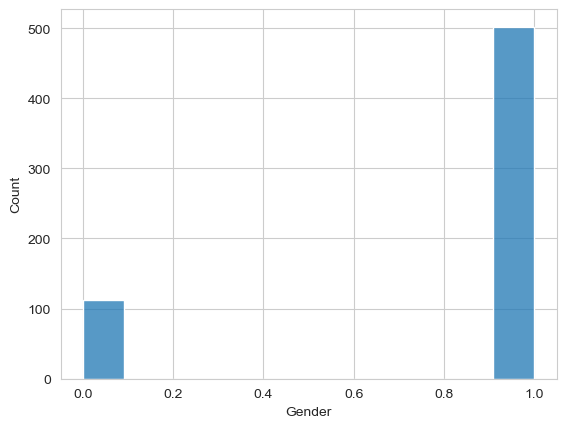

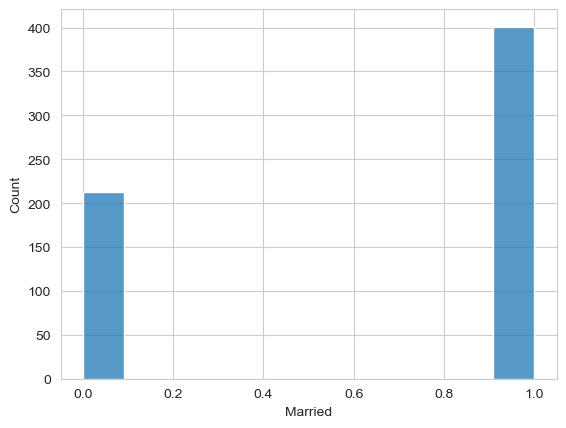

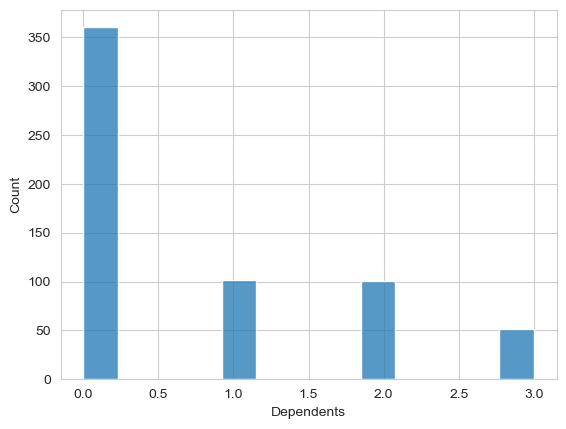

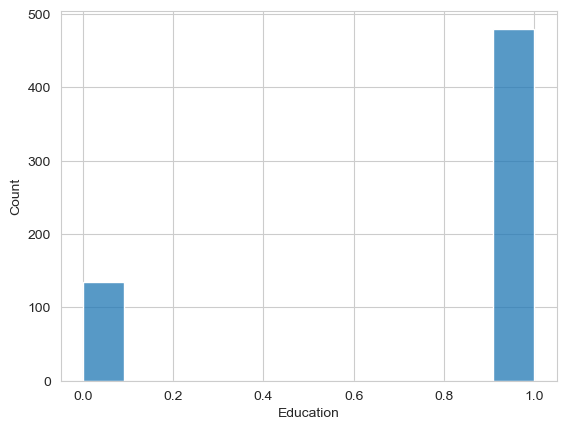

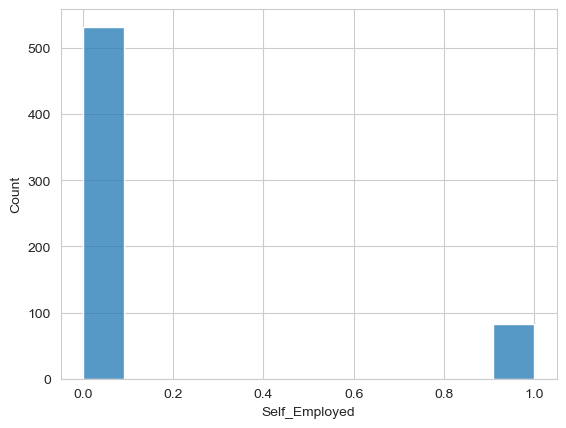

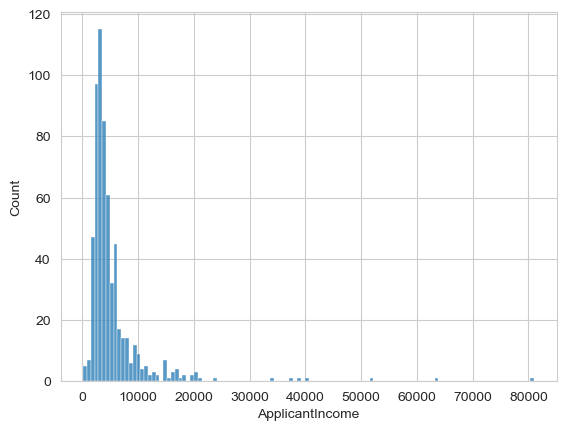

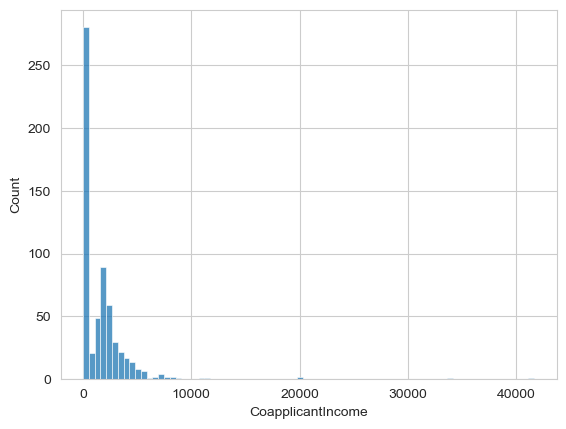

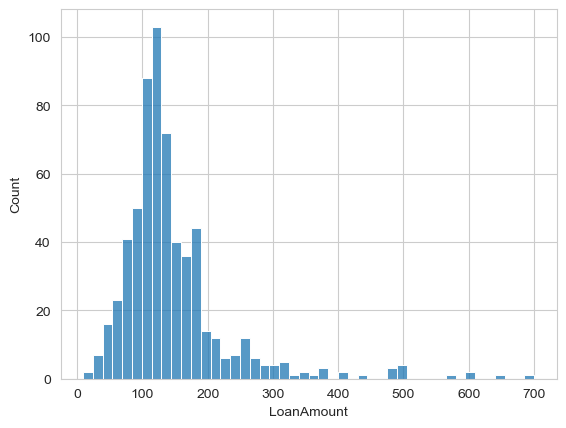

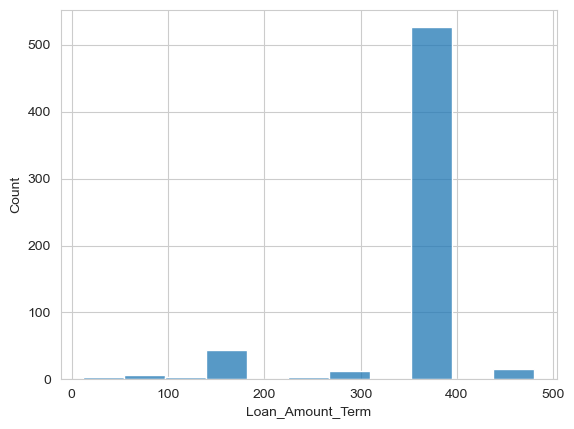

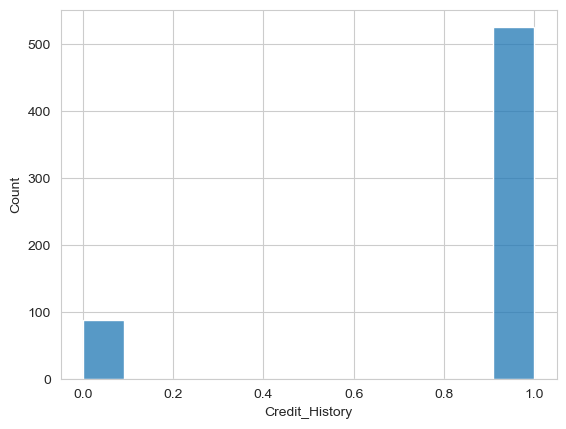

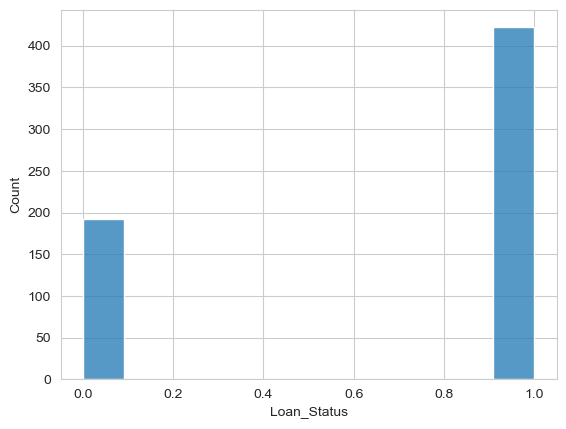

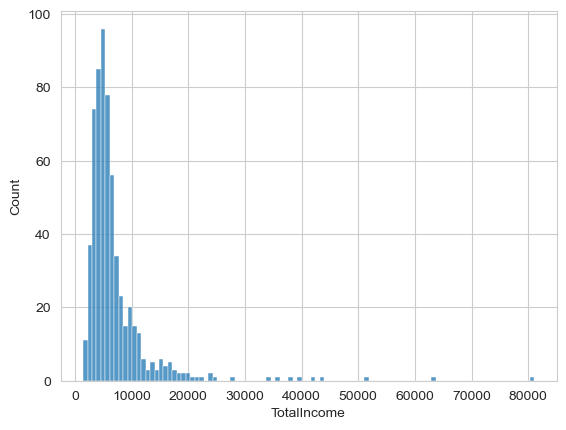

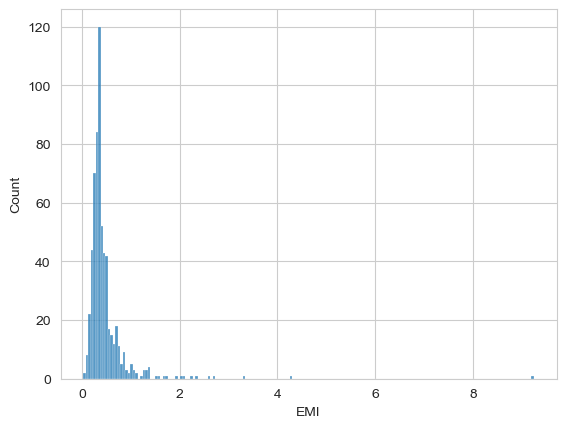

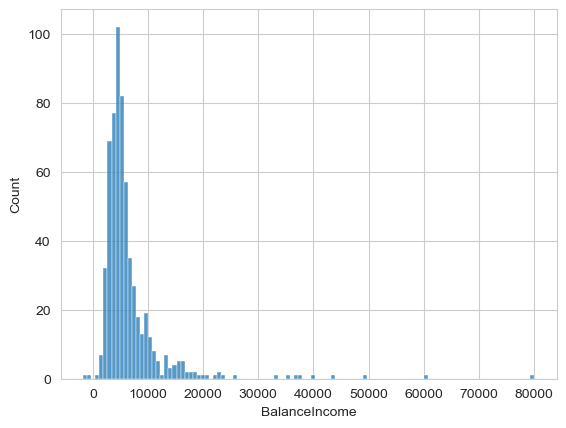

In [109]:
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data = df, x = i)
    plt.show()

- Loan approval status is imbalanced with more approvals (422) than rejections (192)
- Additional visualizations would be needed to explore relationships between features and loan status`,